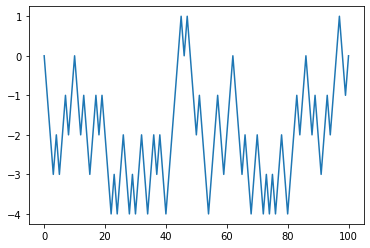

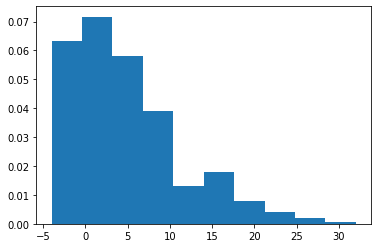

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_reflect(n, reflect = -4):
    walk = [0]
    for _ in range(n):
        if walk[-1] == reflect:
            walk.append(walk[-2])
        else:
            if np.random.random() > 0.5:
                walk.append(walk[-1]+1)
            else:
                walk.append(walk[-1]-1)
    return walk

plt.plot(range(101),random_walk_reflect(100))
plt.show()
plt.hist([random_walk_reflect(100)[-1] for _ in range(1000)], density=True)
plt.show()

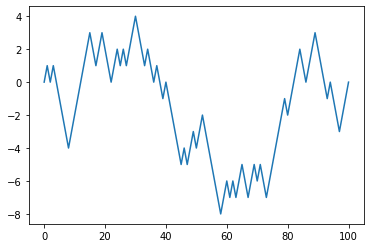

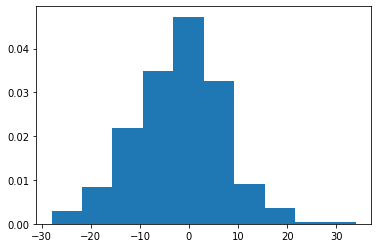

In [14]:
def random_walk_partB(n, block=6):
    walk = [0]
    for _ in range(n):
        if walk[-1] == block:
            if np.random.random() > 0.75:
                walk.append(walk[-1]+1)
            else:
                walk.append(walk[-1]-1)
        else:
            if np.random.random() > 0.5:
                walk.append(walk[-1]+1)
            else:
                walk.append(walk[-1]-1)
    return walk


plt.plot(range(101),random_walk_partB(100))
plt.show()
plt.hist([random_walk_partB(100)[-1] for _ in range(1000)], density=True)
plt.show()

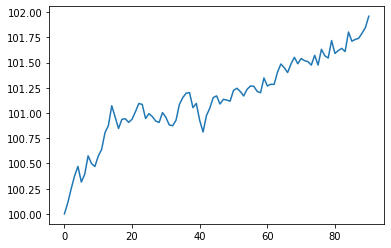

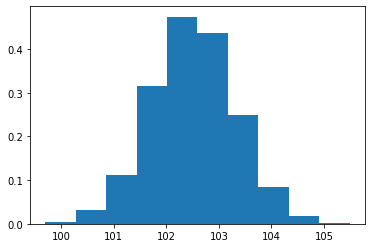

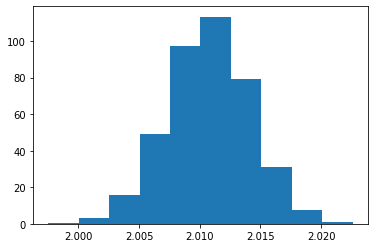

In [15]:
def BS(n, S0=100, dt=1/365, mu=0.1, sigma=0.3):
    prices = [S0]
    for _ in range(n):
        prices.append(prices[-1]+(prices[-1]*(mu*dt + sigma*np.random.normal(0,dt))))

    return prices

plt.plot(range(91),BS(90))
plt.show()

plt.hist([BS(90)[-1] for _ in range(10000)], density=True)
plt.show()

plt.hist([np.log10(BS(90)[-1]) for _ in range(10000)], density=True)
plt.show()

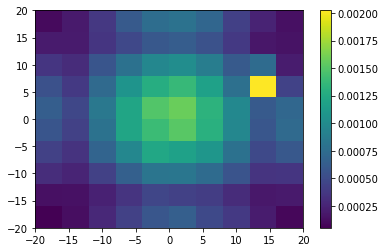

In [32]:
def walk2d_hole(n):
    posx = 0
    posy = 0
    for _ in range(n):
        if posx >= 13 and posx <= 14 and posy >= 7 and posy <= 8:
            break
        elif posx == 20 or posx == -20 or posy == 20 or posy == -20:
            break
        else:
            if np.random.random() > 0.5:
                posx += 1
            else:
                posx -= 1
            if np.random.random() > 0.5:
                posy += 1
            else:
                posy -= 1
    return (posx,posy)


walks = [walk2d_hole(100) for _ in range(100000)]
plt.hist2d([i[0] for i in walks], [i[1] for i in walks], density=True)
plt.colorbar()
plt.show()
    

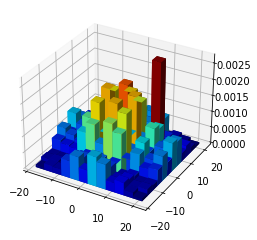

In [35]:
from matplotlib import cm

xAmplitudes = [i[0] for i in walks]
yAmplitudes =  [i[1] for i in walks]

x = np.array(xAmplitudes)  
y = np.array(yAmplitudes)

fig = plt.figure()       
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(x, y, bins=(12,12), density=True)
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet')
max_height = np.max(dz)  
min_height = np.min(dz)

rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.show()